In [113]:
import pandas as pd
import numpy as np
import boxx
import json
import os
import random
from shutil import move
import matplotlib.pyplot as plt
import cv2

In [2]:
os.listdir('archive (1)/retail_product_checkout/')

['Data',
 'instances_test2019.json',
 'instances_train2019.json',
 'instances_val2019.json',
 'test2019',
 'train2019',
 'val2019']

In [3]:
train_js = boxx.loadjson('archive (1)/retail_product_checkout/instances_train2019.json')

In [4]:
boxx.tree(train_js, deep=1)

└── /: dict  6
    ├── info: dict  7
    ├── licenses: list  1
    ├── categories: list  200
    ├── __raw_Chinese_name_df: list  200
    ├── images: list  53739
    └── annotations: list  53739


In [5]:
info = pd.DataFrame(train_js['info'])

In [6]:
info

,description,url,version,year,contributor,date_created,dataset_license
0,RPC: A Large-Scale Retail Product Checkout Dat...,http://RPC-Dataset.github.io,1.1,2019,Megvii Research Nanjing,2019/01/09,{'url': 'http://creativecommons.org/licenses/b...


# Categories

In [7]:
categories = pd.DataFrame(train_js['categories'])

In [8]:
categories.shape

(200, 3)

In [9]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  200 non-null    object
 1   id             200 non-null    int64 
 2   name           200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [10]:
categories.head()

,supercategory,id,name
0,puffed_food,1,1_puffed_food
1,puffed_food,2,2_puffed_food
2,puffed_food,3,3_puffed_food
3,puffed_food,4,4_puffed_food
4,puffed_food,5,5_puffed_food


In [11]:
categories['supercategory'].unique()

array(['puffed_food', 'dried_fruit', 'dried_food', 'instant_drink',
       'instant_noodles', 'dessert', 'drink', 'alcohol', 'milk',
       'canned_food', 'chocolate', 'gum', 'candy', 'seasoner',
       'personal_hygiene', 'tissue', 'stationery'], dtype=object)

# Raw_chinese_name

In [12]:
names = pd.DataFrame(train_js['__raw_Chinese_name_df'])

In [13]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku_name     200 non-null    object
 1   category_id  200 non-null    int64 
 2   sku_class    200 non-null    object
 3   code         200 non-null    int64 
 4   shelf        200 non-null    int64 
 5   num          200 non-null    int64 
 6   name         200 non-null    object
 7   clas         200 non-null    object
 8   known        200 non-null    bool  
 9   ind          200 non-null    int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 14.4+ KB


In [14]:
names.head()

,sku_name,category_id,sku_class,code,shelf,num,name,clas,known,ind
0,1_puffed_food,1,puffed_food,6909409012031,1,4,上好佳荷兰豆55g,膨化食品,True,0
1,2_puffed_food,2,puffed_food,6901845043112,1,5,菜园小饼80g,膨化食品,True,1
2,3_puffed_food,3,puffed_food,6909409012024,1,5,上好佳鲜虾片40g,膨化食品,True,2
3,4_puffed_food,4,puffed_food,6926265388100,1,5,上好佳蟹味逸族40g,膨化食品,True,3
4,5_puffed_food,5,puffed_food,6924743920330,1,4,妙脆角魔力炭烧味65g,膨化食品,True,4


# images

In [15]:
images = pd.DataFrame(train_js['images'])

In [16]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53739 entries, 0 to 53738
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  53739 non-null  object
 1   width      53739 non-null  int64 
 2   height     53739 non-null  int64 
 3   id         53739 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ MB


In [17]:
images.head()

,file_name,width,height,id
0,038900004095_camera0-13.jpg,2592,1944,0
1,038900004095_camera0-18.jpg,2592,1944,1
2,038900004095_camera0-11.jpg,2592,1944,2
3,038900004095_camera0-10.jpg,2592,1944,3
4,038900004095_camera0-17.jpg,2592,1944,4


In [18]:
images[images['file_name'].str.contains("6909409012031")]['file_name']

12146    6909409012031-back_camera0-15.jpg
12147    6909409012031-back_camera0-16.jpg
12148    6909409012031-back_camera0-11.jpg
12149    6909409012031-back_camera0-10.jpg
12150    6909409012031-back_camera0-14.jpg
                       ...                
12462          6909409012031_camera3-6.jpg
12463          6909409012031_camera3-8.jpg
12464          6909409012031_camera3-4.jpg
12465          6909409012031_camera3-9.jpg
12466          6909409012031_camera3-7.jpg
Name: file_name, Length: 320, dtype: object

# Annotations

In [19]:
ann = pd.DataFrame(train_js['annotations'])

In [20]:
ann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53739 entries, 0 to 53738
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          53739 non-null  float64
 1   bbox          53739 non-null  object 
 2   category_id   53739 non-null  int64  
 3   id            53739 non-null  int64  
 4   image_id      53739 non-null  int64  
 5   iscrowd       53739 non-null  int64  
 6   segmentation  53739 non-null  object 
 7   point_xy      53739 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [21]:
ann.head()

,area,bbox,category_id,id,image_id,iscrowd,segmentation,point_xy
0,111763.29,"[1188.4, 1052.45, 390.96, 285.87]",112,0,0,0,[[]],"[1383.88, 1195.38]"
1,110516.13,"[1214.89, 1053.72, 392.36, 281.67]",112,1,1,0,[[]],"[1411.07, 1194.56]"
2,108233.00,"[1180.52, 1055.31, 384.33, 281.62]",112,2,2,0,[[]],"[1372.68, 1196.12]"
3,113598.14,"[1171.68, 1047.6, 399.85, 284.1]",112,3,3,0,[[]],"[1371.61, 1189.65]"
4,115162.14,"[1197.98, 1052.86, 413.0, 278.84]",112,4,4,0,[[]],"[1404.48, 1192.28]"


## Now i will be creating classes of the images based on their supercategory and assign them to their respective folders

Creating a list of all the supe-rcategories, there are 17

In [22]:
 s_cat = pd.unique(categories['supercategory'])

In [23]:
s_cat

array(['puffed_food', 'dried_fruit', 'dried_food', 'instant_drink',
       'instant_noodles', 'dessert', 'drink', 'alcohol', 'milk',
       'canned_food', 'chocolate', 'gum', 'candy', 'seasoner',
       'personal_hygiene', 'tissue', 'stationery'], dtype=object)

In [24]:
src = 'archive (1)/retail_product_checkout/Data/'

In [25]:
#for i in s_cat:
#    path = os.path.join(src,i)
#    os.mkdir(path)

In [26]:
os.listdir('archive (1)/retail_product_checkout/Data/')

['alcohol',
 'candy',
 'canned_food',
 'chocolate',
 'dessert',
 'dried_food',
 'dried_fruit',
 'drink',
 'gum',
 'instant_drink',
 'instant_noodles',
 'milk',
 'personal_hygiene',
 'puffed_food',
 'seasoner',
 'stationery',
 'tissue']

Now we have created 17 folders in the Data directory, we will have to segregate the images from train directory into these specific folders.

## Now we know there are 17 super-categories and 200 categories distributed in these 17 super-cat. Let us see how they are distributed

In [27]:
categories.groupby(['supercategory']).size().to_frame('Count').reset_index()

,supercategory,Count
0,alcohol,11
1,candy,10
2,canned_food,14
3,chocolate,12
4,dessert,17
5,dried_food,9
6,dried_fruit,9
7,drink,15
8,gum,8
9,instant_drink,11


### Now we will create list for each super-category and assign the product codes of the respective products into that list

In [28]:
#list of alcohol product codes
alcohol = []
alc = names['code'][names['sku_class']=='alcohol']
for i in alc:
    alcohol.append(i)

In [29]:
#list of candy product codes
candy = []
can = names['code'][names['sku_class']=='candy']
for i in can:
    candy.append(i)

In [30]:
#list of canned_food product codes
canned_food = []
cnd = names['code'][names['sku_class']=='canned_food']
for i in cnd:
    canned_food.append(i)

In [31]:
#list of chocolate product codes
chocolate = []
clt = names['code'][names['sku_class']=='chocolate']
for i in clt:
    chocolate.append(i)

In [32]:
#list of dessert product codes
dessert = []
dsrt = names['code'][names['sku_class']=='dessert']
for i in dsrt:
    dessert.append(i)

In [33]:
#list of dried_food product codes
dried_food = []
drdfd = names['code'][names['sku_class']=='dried_food']
for i in drdfd:
    dried_food.append(i)

In [34]:
#list of dried_fruit product codes
dried_fruit = []
drdft = names['code'][names['sku_class']=='dried_fruit']
for i in drdft:
    dried_fruit.append(i)

In [35]:
#list of drink product codes
drink = []
drnk = names['code'][names['sku_class']=='drink']
for i in drnk:
    drink.append(i)

In [36]:
#list of gum product codes
gum = []
gm = names['code'][names['sku_class']=='gum']
for i in gm:
    gum.append(i)

In [37]:
#list of instant_drink product codes
instant_drink = []
idrnk = names['code'][names['sku_class']=='instant_drink']
for i in idrnk:
    instant_drink.append(i)

In [38]:
#list of instant_noodles product codes
instant_noodles = []
indls = names['code'][names['sku_class']=='instant_noodles']
for i in indls:
    instant_noodles.append(i)

In [39]:
#list of milk product codes
milk = []
mlk = names['code'][names['sku_class']=='milk']
for i in mlk:
    milk.append(i)

In [40]:
#list of personal_hygiene product codes
personal_hygiene = []
phy = names['code'][names['sku_class']=='personal_hygiene']
for i in phy:
    personal_hygiene.append(i)

In [41]:
#list of puffed_food product codes
puffed_food = []
pfd = names['code'][names['sku_class']=='puffed_food']
for i in pfd:
    puffed_food.append(i)

In [42]:
#list of seasoner product codes
seasoner = []
ssr = names['code'][names['sku_class']=='seasoner']
for i in ssr:
    seasoner.append(i)

In [81]:
#list of stationary product codes
stationary = []
sttr = names['code'][names['sku_class']=='stationery']
for i in sttr:
    stationary.append(i)

In [44]:
#list of tissue product codes
tissue = []
tis = names['code'][names['sku_class']=='tissue']
for i in tis:
    tissue.append(i)

We will use code from the following lists to find images and move them to repective directory.

In [45]:
source = 'archive (1)/retail_product_checkout/train2019/'


In [46]:
def get_filenames(code):
    lst = []
    for i in code:
     tmpe = images[images['file_name'].str.contains(i)]['file_name']
     for k in tmpe:
        lst.append(k)  
    return lst

In [55]:
def transfer(source,destination,filenames):
    for filename in filenames:
        file = source + filename
        dest = destination + filename
        move(file,dest)

In [56]:
alcohol = [str(i) for i in alcohol]
alcohol_names = get_filenames(alcohol)
des_alc = 'archive (1)/retail_product_checkout/Data/alcohol/'
transfer(source,des_alc,alcohol_names)

In [ ]:
candy = [str(i) for i in candy]
candy_names = get_filenames(candy)
des_cnd = 'archive (1)/retail_product_checkout/Data/candy/'
transfer(source,des_cnd,candy_names)

In [ ]:
    
canned_food = [str(i) for i in canned_food]
canned_food_names = get_filenames(canned_food)
des_cndfd = 'archive (1)/retail_product_checkout/Data/canned_food/'
transfer(source,des_cndfd,canned_food_names)

In [ ]:
chocolate = [str(i) for i in chocolate]
chocolate_names = get_filenames(chocolate)
des_clc = 'archive (1)/retail_product_checkout/Data/chocolate/'
transfer(source,des_clc,chocolate_names)

In [ ]:
dessert = [str(i) for i in dessert]
dessert_names = get_filenames(dessert)
des_dsrt = 'archive (1)/retail_product_checkout/Data/dessert/'
transfer(source,des_dsrt,dessert_names)

In [ ]:
dried_food = [str(i) for i in dried_food]
dried_food_names = get_filenames(dried_food)
des_drdfd = 'archive (1)/retail_product_checkout/Data/dried_food/'
transfer(source,des_drdfd,dried_food_names)

In [ ]:
dried_fruit = [str(i) for i in dried_fruit]
dried_fruit_names = get_filenames(dried_fruit)
des_drdft = 'archive (1)/retail_product_checkout/Data/dried_fruit/'
transfer(source,des_drdft,dried_fruit_names)

In [ ]:
drink = [str(i) for i in drink]
drink_names = get_filenames(drink)
des_drnk = 'archive (1)/retail_product_checkout/Data/drink/'
transfer(source,des_drnk,drink_names)

In [ ]:
gum = [str(i) for i in gum]
gum_names = get_filenames(gum)
des_gm = 'archive (1)/retail_product_checkout/Data/gum/'
transfer(source,des_gm,gum_names)

In [ ]:
instant_drink = [str(i) for i in instant_drink]
instant_drink_names = get_filenames(instant_drink)
des_intdrnk = 'archive (1)/retail_product_checkout/Data/instant_drink/'
transfer(source,des_intdrnk,instant_drink_names)

In [ ]:
milk = [str(i) for i in milk]
milk_names = get_filenames(milk)
des_mlk = 'archive (1)/retail_product_checkout/Data/milk/'
transfer(source,des_mlk,milk_names)

In [ ]:
personal_hygiene = [str(i) for i in personal_hygiene]
personal_hygiene_names = get_filenames(personal_hygiene)
des_hyg = 'archive (1)/retail_product_checkout/Data/personal_hygiene/'
transfer(source,des_hyg,personal_hygiene_names)

In [ ]:
puffed_food = [str(i) for i in puffed_food]
puffed_food_names = get_filenames(puffed_food)
des_pfdfd = 'archive (1)/retail_product_checkout/Data/puffed_food/'
transfer(source,des_pfdfd,puffed_food_names)

In [ ]:
seasoner = [str(i) for i in seasoner]
seasoner_names = get_filenames(seasoner)
des_ssnr = 'archive (1)/retail_product_checkout/Data/seasoner/'
transfer(source,des_ssnr,seasoner_names)

In [ ]:
stationary = [str(i) for i in stationary]
stationary_names = get_filenames(stationary)
des_sttr = 'archive (1)/retail_product_checkout/Data/stationery/'
transfer(source,des_sttr,stationary_names)

In [ ]:
tissue = [str(i) for i in tissue]
tissue_names = get_filenames(tissue)
des_ts = 'archive (1)/retail_product_checkout/Data/tissue/'
transfer(source,des_ts,tissue_names)

In [ ]:
instant_noodles = [str(i) for i in instant_noodles]
instant_noodles_names = get_filenames(instant_noodles)
des_ndls = 'archive (1)/retail_product_checkout/Data/instant_noodles/'
transfer(source,des_ndls,instant_noodles_names)

In [ ]:
des_

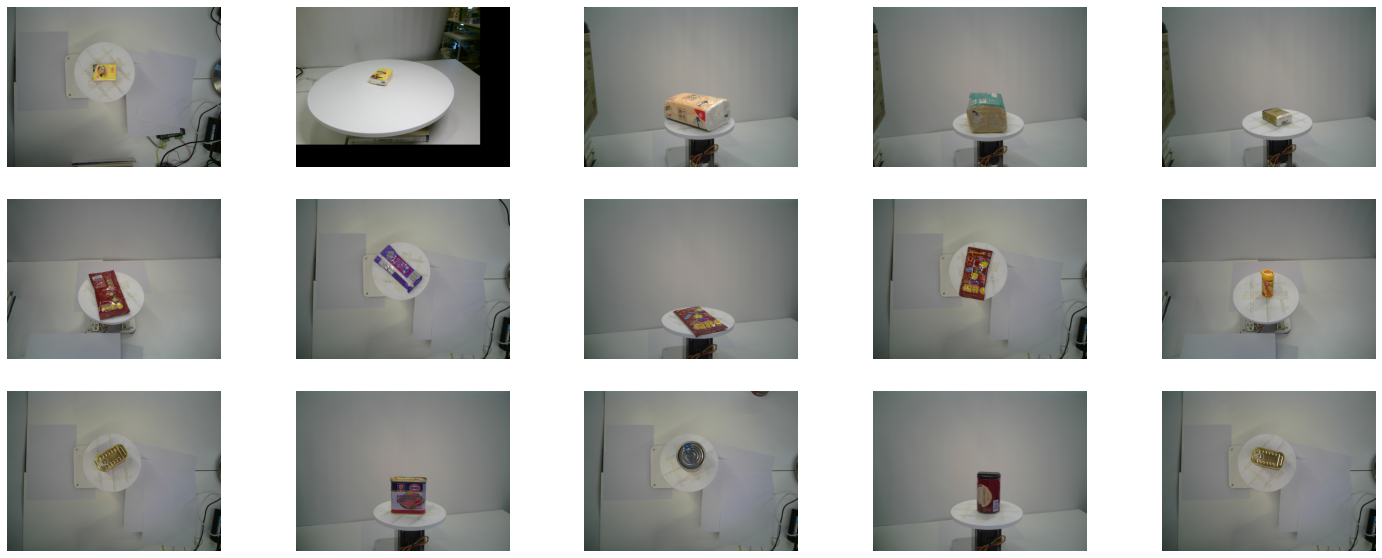

In [106]:
next_alcohol_pic = [os.path.join(des_alc, fname) for fname in random.sample(os.listdir(des_alc), 5)]
next_candy_pic = [os.path.join(des_cnd, fname) for fname in random.sample(os.listdir(des_cnd), 5)]
next_cannedfood_pic = [os.path.join(des_cndfd, fname) for fname in random.sample(os.listdir(des_cndfd), 5)]
plt.figure(figsize=(25,10))
for i, img_path in enumerate(next_alcohol_pic + next_candy_pic + next_cannedfood_pic):
    ax = plt.subplot(3, 5, i+1)
    ax.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img)

In [119]:
strin = 'harsh'

In [120]:
strin[1]

'a'

In [123]:
strin.insert('y')

AttributeError: 'str' object has no attribute 'insert'

In [128]:
a = int(input())
for i in range(a):
    b = str(input())
    c = len(b)
    s = ''
    for k in range(1,c):
        s = s + b[c-k] 
        print(s)

1
456
6
65


In [125]:
s


'6'

In [129]:
percentiles = [98, 76.37, 55.55, 69, 88]
first_subject = np.array(percentiles)
print(first_subject.dtype)

float64
